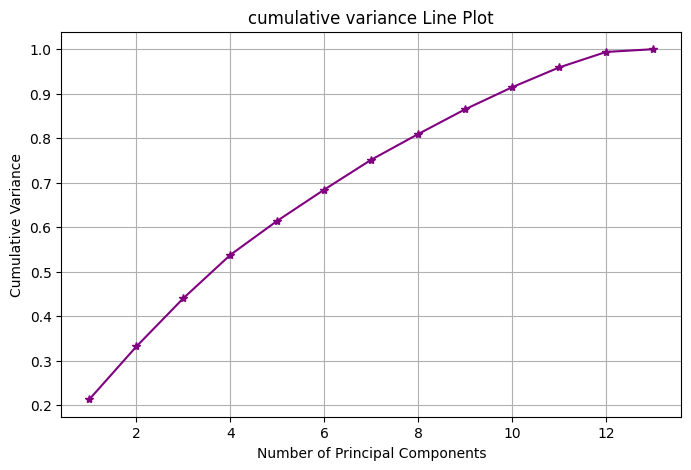

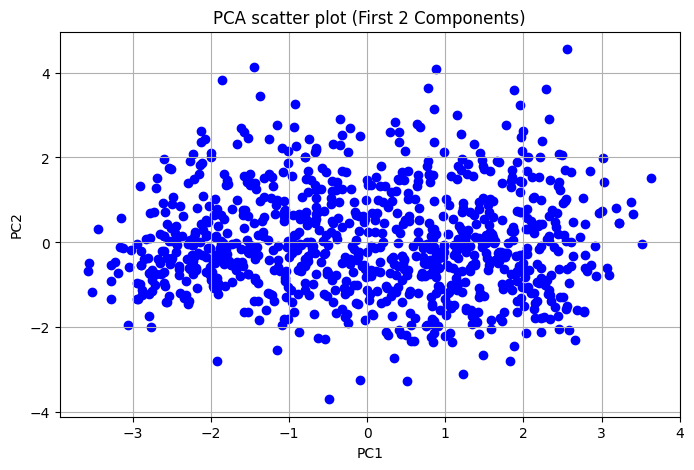

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load processed data
df_encoded = pd.read_csv('data/heart_disease.csv')
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#PCA
pca=PCA()
x_pca=pca.fit_transform(X_scaled)
df_pca=pd.DataFrame(
      x_pca,
      columns=[f"pc{i+1}"for i in range (x_pca.shape[1])]
)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
#cumulative var plot
plt.figure(figsize=(8, 5))
plt.title("cumulative variance Line Plot")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")
plt.plot(range(1, len(cumulative_variance) + 1),cumulative_variance,marker="*",color='purple')
#length of cumulative_varianc = number of components 
# x-axis = component numbers, y-axis = cumulative variance
plt.grid(True)
plt.show()

#scatter plot
plt.figure(figsize=(8,5))
plt.title("PCA scatter plot (First 2 Components)")
plt.scatter(df_pca["pc1"], df_pca["pc2"],color='b')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()